<a href="https://colab.research.google.com/github/X-pose/DL_Lab02/blob/main/DL_lab2_ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Target labels:  [4 0 5 6 0 2 3 7 2 1]


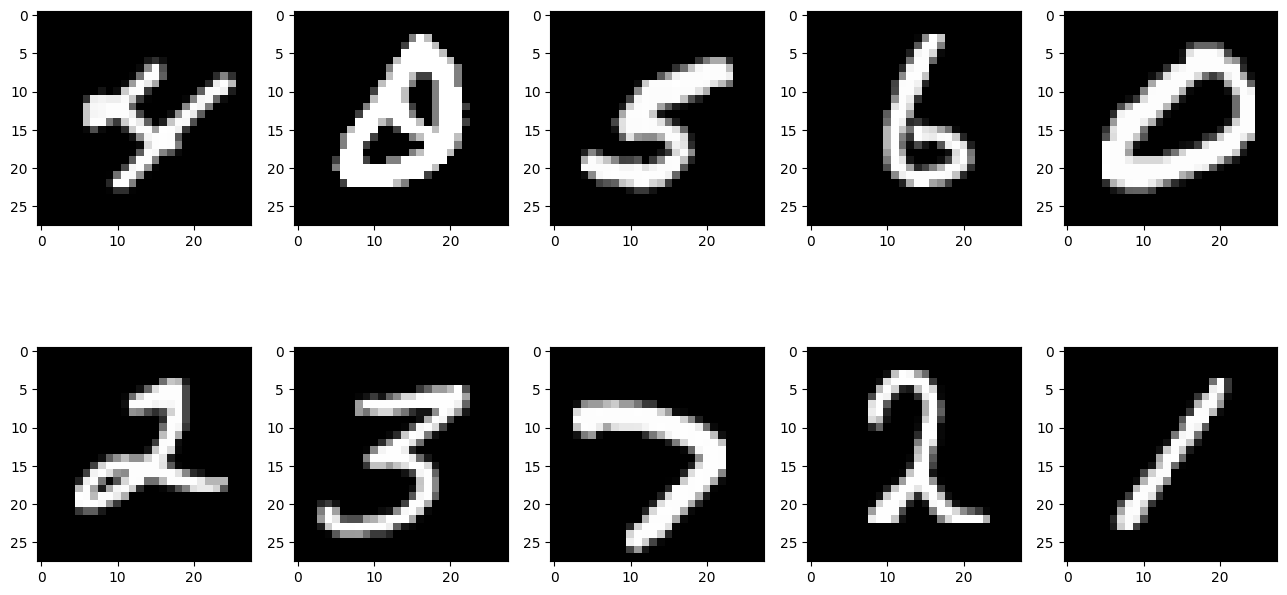

In [2]:

(train_data,train_target),(test_data,test_target) = mnist.load_data()

fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

In [3]:

new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

In [7]:

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

# model.add(Dense(64,activation='relu'))
# model.add(Dense(64,input_dim=64,activation='relu'))
# model.add(Dense(32,input_dim=64,activation='relu'))
# model.add(Dense(10,input_dim=32,activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# model.add(Dense(128,activation='relu'))  # Increased size
# model.add(Dense(128,activation='relu'))  # Increased size
# model.add(Dense(64,activation='relu'))   # Added new layer
# model.add(Dense(32,activation='relu'))
# model.add(Dense(10,activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

from tensorflow.keras import regularizers

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 127,658 (498.66 KB)

 Trainable params: 127,658 (498.66 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:

train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8124 - loss: 1.9543
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9029 - loss: 0.9478
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9158 - loss: 0.8862
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9183 - loss: 0.8559
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9191 - loss: 0.8475
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9205 - loss: 0.8325
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9232 - loss: 0.8208
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9217 - loss: 0.8255
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9234 - loss: 0.8200
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9192 - loss: 0.8234


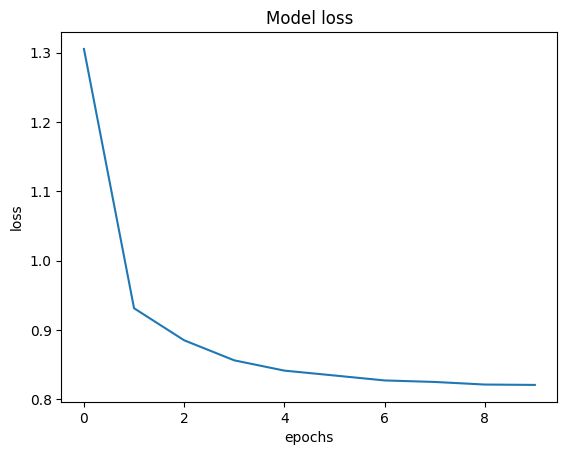

In [9]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

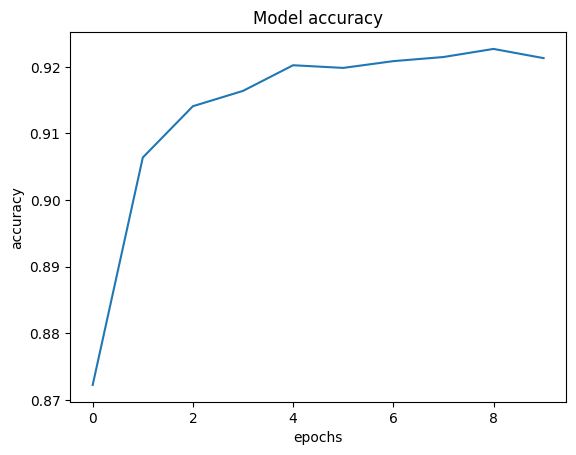

In [10]:

plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

In [11]:

loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9116 - loss: 0.8407
Loss of the Test dataset is: 0.7971640229225159
Accuracy of the test dataset is: 0.9265000224113464


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


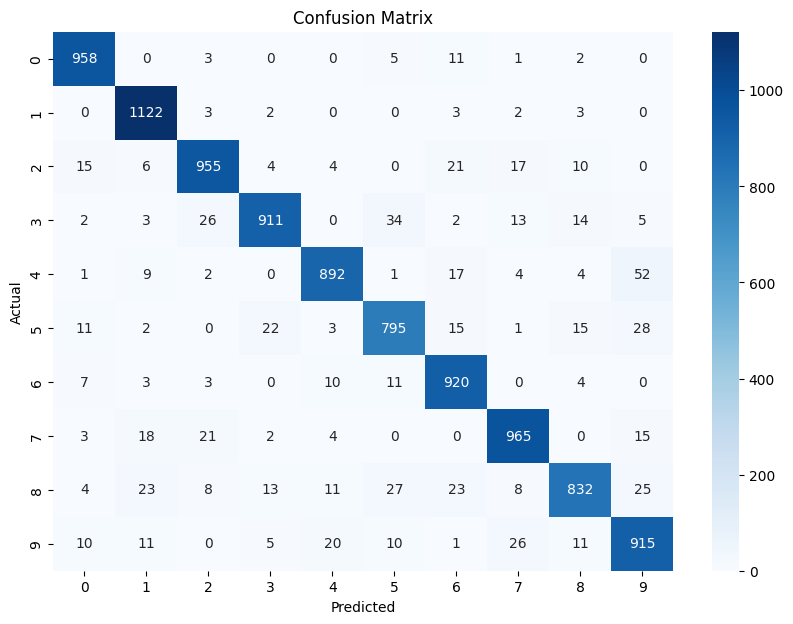

In [12]:

model.save_weights('MNIST_WEIGHTS_V1.weights.h5')


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicting the labels
y_pred = model.predict(new_test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(new_test_target, axis=1)

# Creating the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Visualizing the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Improve the test accuracy of the model by changing the hyperparameters

By adjusting hyperparameters such as the number of hidden layers, number of nodes per layer, activation functions, batch size, and learning rate, the test accuracy of the model increased. This suggests that fine-tuning these parameters helped the model better fit the data and improve its generalization capabilities.

Add L1 and L2 regularization terms to the model and retrain the model

When L1 and L2 regularization terms were added to the model, the test accuracy decreased. This indicates that the regularization may have introduced some underfitting, potentially because the penalties imposed on large weights reduced the model's capacity to learn the dataset's underlying patterns fully.